In [2]:
import pandas as pd
import preprocessing

C:\Users\mit\anaconda3\envs\herbie\lib\site-packages\toolbox\cartopy_tools.py:60: UserWarning: Migrate to `cartopy_tools2` for latest updates and features.
  warnings.warn("Migrate to `cartopy_tools2` for latest updates and features.")


## Clean fire observation pixels and merge them to US government incident IDs ##

### The raw files are too big for GitHub, will put on Dropbox. Do not worry about this part for now  ###

In [3]:
viirs_path = r"C:\Users\mit\Dropbox (MIT)\Jacob_Sequoia_Sara\example_data\viirs_npp_2020\fire_archive_SV-C2_230749.shp"
SIT_conn_str = (r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
            r'DBQ=C:\Users\mit\Documents\wildfires\data\sit\2020 SIT DATA.accdb;')
boundaries_path = 'data/historical_perimeters/InteragencyFirePerimeterHistory.shp'

fires_df, boundaries, unambiguous_fire_pixels = preprocessing.get_fire_pixels(viirs_path, SIT_conn_str, boundaries_path, 2020)

fires_df.to_csv('data/clean/viirs.csv', index=False)
boundaries.to_pickle('data/clean/merged_boundaries.pkl')
unambiguous_fire_pixels.to_csv('data/clean/fire_pixels_lookup.csv', index=False)

C:\Users\mit\anaconda3\envs\herbie\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


## Create standardized grids for the fires and merges in the weather data ##

In [3]:
boundaries = pd.read_pickle('data/clean/merged_boundaries.pkl')
fire_pixels_lookup = pd.read_csv('data/clean/fire_pixels_lookup.csv')
fire_pixels = pd.read_csv('data/clean/viirs.csv')

### Take a look at these data sets. fire_pixels is all the fire observations, and fire_pixel_lookup allows a merge to the boundaries data, which contains the final boundary of the fire ###

In [4]:
boundaries.head()

,INCIDENT_IDENTIFIER,INCIDENT_NAME,DISCOVERY_DATE,POO,IRWINID,FID,MAP_METHOD,INCIDENT,UNIT_ID,POO_RESP_I,geometry,area,bbox
0,11885771,DOE,8/16/2020 10:48:00 AM,POINT (-122.6733 39.76539),BA03E3D0-EC8B-4346-BD98-FF31E6E09BC7,76341,Digitized Other,DOE,CAMNF,CAMNF,"MULTIPOLYGON (((-122.68532 39.88451, -122.6853...",0.250940,"(-123.27830789099994, 39.43730706400004, -122...."
1,11908866,CREEK,9/4/2020 8:33:00 PM,POINT (-119.2716 37.201),33CBB9DC-6983-4F47-B821-9C9A6CAC381D,76487,Infrared Interpretation,CREEK,CASNF,CASNF,"MULTIPOLYGON (((-119.18146 37.09613, -119.1815...",0.156303,"(-119.48450898299996, 36.989858679000065, -118..."
4,11837476,LIONSHEAD,8/16/2020 10:44:00 PM,POINT (-121.6788889 44.7225),DC9FEF19-D7AB-4500-B319-ACBA1DB2776A,36121,Infrared Interpretation,Lionshead,ORWSA,ORWSA,"MULTIPOLYGON (((-122.09022 44.64935, -122.0903...",0.094097,"(-122.16333494099996, 44.60502535900008, -121...."
5,11856938,CAMERON PEAK,8/13/2020 2:48:00 PM,POINT (-105.8792 40.6087),53741A13-D269-4CD5-AF91-02E094B944DA,43855,Infrared Interpretation,Cameron Peak,COARF,COARF,"MULTIPOLYGON (((-105.88333 40.54598, -105.8837...",0.089957,"(-105.90370655599997, 40.46133897900006, -105...."
6,11887587,BEACHIE CREEK,8/16/2020 1:18:00 PM,POINT (-122.188 44.82111),5DCC1365-150C-4EE3-9D94-627D92C141D8,36119,Other,Beachie Creek,ORWIF,ORWIF,"MULTIPOLYGON (((-122.59762 45.02286, -122.5975...",0.089152,"(-122.67143949499996, 44.69332474400005, -122...."


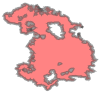

In [6]:
boundaries['geometry'].iloc[0]

In [7]:
fire_pixels_lookup.head()

,pixel_id,INCIDENT_IDENTIFIER
0,20200817_0912_000128,11837476
1,20200817_0912_000343,11837476
2,20200817_0912_000446,11837476
3,20200817_0912_000455,11837476
4,20200817_0912_000458,11837476


In [8]:
fire_pixels.head()

,pixel_id,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,time,time_from_reference
0,20200101_0724_000000,37.537025,-76.805679,295.63,0.45,0.47,2020-01-01,724,N,VIIRS,n,1,278.65,1.40,N,3,2020-01-01 07:24:00,631178640.0
1,20200101_0724_000001,41.681255,-87.416183,295.68,0.46,0.39,2020-01-01,724,N,VIIRS,n,1,274.07,1.30,N,3,2020-01-01 07:24:00,631178640.0
2,20200101_0724_000002,41.626736,-87.144905,295.76,0.45,0.39,2020-01-01,724,N,VIIRS,n,1,271.30,1.09,N,2,2020-01-01 07:24:00,631178640.0
3,20200101_0724_000003,41.004417,-96.156219,295.90,0.40,0.60,2020-01-01,724,N,VIIRS,n,1,269.61,1.08,N,2,2020-01-01 07:24:00,631178640.0
4,20200101_0724_000004,41.622654,-87.327751,295.94,0.46,0.39,2020-01-01,724,N,VIIRS,n,1,268.58,0.82,N,3,2020-01-01 07:24:00,631178640.0


### Now we can merge in the weather data ###

In [ ]:
fire_pixels = pd.merge(fire_pixels, fire_pixels_lookup, on='pixel_id', how='right', validate='1:1')
fire_pixels = fire_pixels[fire_pixels['INCIDENT_IDENTIFIER'].notna()]
fire_pixels['INCIDENT_IDENTIFIER'] = fire_pixels['INCIDENT_IDENTIFIER'].astype(str)

fields = pd.read_csv('data/input/hrrr_fields.csv')

out_path = 'data/clean/fire_histories/'

preprocessing.merge_all_fire_and_weather_data(fire_pixels, boundaries, fields, out_path)

### Here is a sample output

In [11]:
file = r'data\clean\fire_histories\11691297\20200329UTC120000.csv'
df = pd.read_csv(file)
df

,x,y,lat,lon,TMP:2 m,SPFH:2 m,UGRD:10 m,VGRD:10 m,LTNG,PRATE,PRES:surface,on_fire
0,0,0,30.200568,-84.892236,295.452384,0.015237,0.613463,1.266454,0.0,0.0,101720.551603,0.0
1,0,1,30.209279,-84.892236,295.449863,0.015209,0.623448,1.241767,0.0,0.0,101698.683841,0.0
2,0,2,30.217989,-84.892236,295.451831,0.015200,0.621480,1.220882,0.0,0.0,101690.245059,0.0
3,0,3,30.226700,-84.892236,295.428994,0.015191,0.634656,1.206295,0.0,0.0,101684.097554,0.0
4,0,4,30.235410,-84.892236,295.398912,0.015174,0.655048,1.175338,0.0,0.0,101675.951687,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,9,4,30.235410,-84.801952,295.354446,0.015128,0.482341,1.163838,0.0,0.0,101689.303006,0.0
86,9,5,30.244121,-84.801952,295.368327,0.015111,0.459022,1.126399,0.0,0.0,101685.950893,0.0
87,9,6,30.252831,-84.801952,295.382170,0.015088,0.428775,1.079746,0.0,0.0,101685.441181,0.0
88,9,7,30.261541,-84.801952,295.388279,0.015077,0.415170,1.058645,0.0,0.0,101684.892695,0.0


### Here is a sample video

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12,12)

inc_id = '11732798'
out_path = 'data/clean/fire_histories/'
path = f'{out_path}{inc_id}'
fig = plt.figure()

ims = []
for i in os.listdir(path):
    if 'hrrr' not in i:
        file = path + '/' + i
        test = pd.read_csv(file)
        A = np.zeros((test['y'].max()+1,test['x'].max()+1))
        A[test['y'],test['x']] = test['on_fire']
        im = plt.imshow(A, origin='lower')
        ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

ani.save('samplefire.gif')